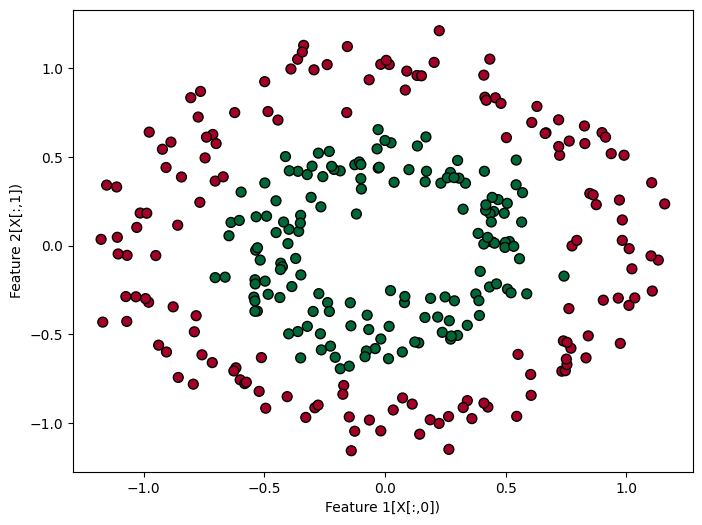

In [18]:
import numpy as no
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

#generate synthetic data (circles)
X, y = make_circles (n_samples = 300, noise = 0.1, factor = 0.5, random_state =0)
#plot the points with their labels
plt.figure(figsize = (8,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlGn, edgecolors = 'k', marker ='o', s= 50)
plt.xlabel('Feature 1[X[:,0])')
plt.ylabel('Feature 2[X[:,1])')
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

#function to update and display the plot
def update_plot (hidden_layer_size):
  #Generate synthetic data (circle)
  #X, y= make_circles (n_samples =300, noise = 0.1, factor = 0.5, random_state =0)
  #Create a multi-layer perceptron (MLP) classifier
  clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation = 'relu',max_iter=3000, random_state=1)
  #fit the classfier to the data
  clf.fit(X,y)
  #create ta grid of points for visualization
  #these are 1D arrays of 100 values each, representing the x and y coordinated of the grid
  x_vals = np.linspace(X[:,0].min()-0.1,X[:,0].max()+0.1,100)
  y_vals = np.linspace(X[:,0].min()-0.1,X[:,1].max()+0.1,100)

  #the resulting X_plane and Y_plane are both 100x100 arrays,
  #representing a grid of 10,000 points
  X_plane, Y_plane = np.meshgrid(x_vals, y_vals)

  #grid_points s a signle 2Darray (grid_points) of shape (10000,2),
  #where each row represents a point in the grid.
  grid_points = np.column_stack ((X_plane.ravel(), Y_plane.ravel()))

  #Predict class labels for the grid points (for decision boundary)
  Z = clf.predict(grid_points)

  #Z.reshape(X_plane.shape) reshapes Z into a 100x100 array.
  Z = Z.reshape(X_plane.shape)

  #predict class labels for the original data points
  y_pred=clf.predict(X)

  #clear previous plot
  plt.clf()

  #plot the decision boundary
  #it is often used to visualise the decision boudnary of a modeel by plotting
  # the predicted class probabilities or labels across a grid of points
  plt.contourf(X_plane, Y_plane, Z, levels=[-0.5,0.5,1.5], cmap=plt.cm.RdYlGn, alpha=0.6)

  #plot the original data points with their predicted labels
  #separate points for each predicted class
  class_0 = y_pred ==0 #indices of points predicted as class 0
  class_1 = y_pred ==0 #indices of points predicted as class 1

  plt.scatter (X[class_0, 0],X[class_0,1],c='red',edgecolors='k', marker='o',s=50, label ="Predicted class 0")
  plt.scatter (X[class_1, 0],X[class_1,1],c='green',edgecolors='k', marker='o',s=50, label ="Predicted class 1")


  # Add labels and title
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title(f'Decision Boundary and Predicted Labels (Hidden Layer Size= {hidden_layer_size})')
  plt.legend()
  plt.show()

  #create a slider for hidden layer size
hidden_layer_size_slider=widgets.IntSlider(value=1,min=1,max=10,step=1,description='Hidden Layer Size')

#Create an interactive
interactive_plot = interactive(update_plot, hidden_layer_size=hidden_layer_size_slider)

#display the widgets
display(interactive_plot)

interactive(children=(IntSlider(value=1, description='Hidden Layer Size', max=10, min=1), Output()), _dom_clas…